# Chronic Kidney Disease Classification

**Data Description:**
1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood ur
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - hemoglobim
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. classification - class

Importing all the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import matplotlib
warnings.filterwarnings('ignore')


Reading kidney_disease into data

In [2]:
missing_values=['\t43' , '\t?' , '\tno' , '\tyes' , ' yes', np.nan , 'NaN', 'ckd\t']
data = pd.read_csv('../input/ckdisease/kidney_disease.csv', na_values = missing_values)

Getting to know the overall data

In [3]:
data.shape

(400, 26)

In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [6]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395.0,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396.0,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397.0,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398.0,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
399,399.0,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53.0,6800.0,6.1,no,no,no,good,no,no,notckd


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              399 non-null    float64
 1   age             385 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             314 non-null    float64
 17  wc              294 non-null    flo

In [8]:
data.isnull().sum()

id                  1
age                15
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                86
wc                106
rc                131
htn                 2
dm                  8
cad                 4
appet               1
pe                  1
ane                 1
classification      2
dtype: int64

In [9]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,399.000000,385.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,314.000000,294.000000,269.000000
mean,199.892231,51.615584,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.687898,8406.122449,4.707435
std,115.492678,17.270301,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.156679,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,100.500000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,200.000000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.500000,65.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,46.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


We can see from the results that outliers will exist and since our data is small so they would result in a bit of a problem for our classification model. Hence we will perform Data cleaning.

---
## Data Cleaning

Firstly checking for duplicate data and removing it.

In [10]:
data.duplicated().sum()

0

Secondly, looking for missing values

In [11]:
data.isnull().sum()

id                  1
age                15
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                86
wc                106
rc                131
htn                 2
dm                  8
cad                 4
appet               1
pe                  1
ane                 1
classification      2
dtype: int64

<AxesSubplot:>

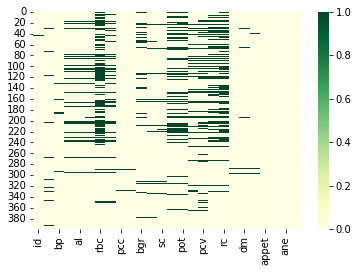

In [12]:
sns.heatmap(data.isnull(), cmap = "YlGn")

Calculating percentage of missing data in each columns

In [13]:
for col in data.columns:
    missing = np.mean(data[col].isnull())
    print('{} - {}% \tmissing data'.format(col, round(missing*100)))

id - 0% 	missing data
age - 4% 	missing data
bp - 3% 	missing data
sg - 12% 	missing data
al - 12% 	missing data
su - 12% 	missing data
rbc - 38% 	missing data
pc - 16% 	missing data
pcc - 1% 	missing data
ba - 1% 	missing data
bgr - 11% 	missing data
bu - 5% 	missing data
sc - 4% 	missing data
sod - 22% 	missing data
pot - 22% 	missing data
hemo - 13% 	missing data
pcv - 22% 	missing data
wc - 26% 	missing data
rc - 33% 	missing data
htn - 0% 	missing data
dm - 2% 	missing data
cad - 1% 	missing data
appet - 0% 	missing data
pe - 0% 	missing data
ane - 0% 	missing data
classification - 0% 	missing data


We note here that majorly 6 columns have more than 20% data loss and we can observe that these 6 columns will have a high percentage of impact on the results.

In [14]:
data_copy = data.copy()
matplotlib.rcParams['figure.figsize'] = (8,5)

## Let's look at the numerical columns 

**Age column**

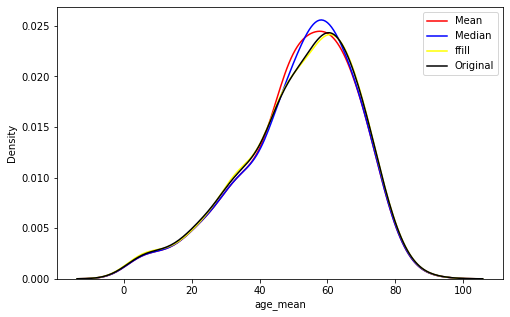

In [15]:
mean = data_copy.age.mean()
median = data_copy.age.median()
data_copy['age_mean'] = data_copy.age.fillna(mean)
data_copy['age_median'] = data_copy.age.fillna(median)
data_copy['new_age'] = data_copy['age'].fillna(method='ffill')

sns.kdeplot(data_copy['age_mean'], color = 'red', label = "Mean")
sns.kdeplot(data_copy['age_median'], color = 'blue', label = "Median")
sns.kdeplot(data_copy['new_age'], color = 'yellow', label = "ffill")
sns.kdeplot(data_copy['age'], color = 'black', label = "Original")
plt.legend()

We can see the ffill has the best congruent distribution curve on the original distribution curve so, it is the best suited for age column.

In [16]:
data['age'] = data_copy['new_age']
data['age'].isnull().sum()

0

**bp column**

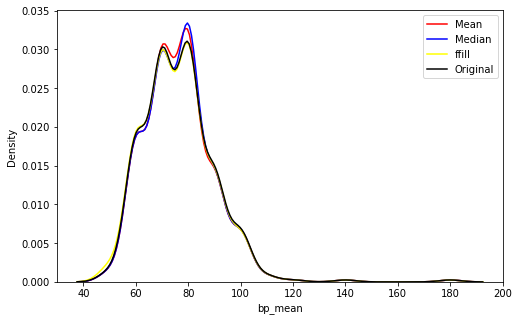

In [17]:
mean = data_copy.bp.mean()
median = data_copy.bp.median()
data_copy['bp_mean'] = data_copy.bp.fillna(mean)
data_copy['bp_median'] = data_copy.bp.fillna(median)
data_copy['new_bp'] = data_copy.bp.fillna(method = 'ffill')

sns.kdeplot(data_copy['bp_mean'], color = 'red', label = 'Mean')
sns.kdeplot(data_copy['bp_median'], color = 'blue', label = 'Median')
sns.kdeplot(data_copy['new_bp'], color='yellow', label = 'ffill')
sns.kdeplot(data_copy['bp'], color = 'black', label = 'Original')
plt.legend()

Similarly we can observe that ffill is the best method to use in order to compensate for the missing values

In [18]:
data['bp'] = data_copy['new_bp']
data['bp'].isnull().sum()

0

**sg column**

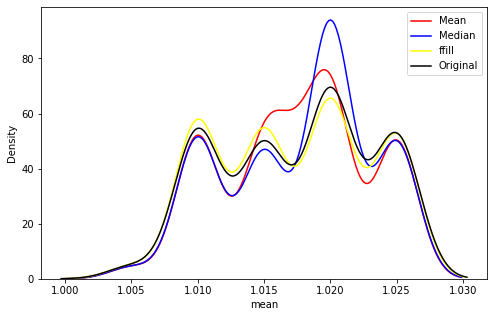

In [19]:
mean = data_copy.sg.mean()
median = data_copy.sg.median()
data_copy['mean'] = data_copy.sg.fillna(mean)
data_copy['median'] = data_copy.sg.fillna(median)
data_copy['new_sg'] = data_copy.sg.fillna(method = 'ffill')

sns.kdeplot(data_copy['mean'], color = 'red', label = 'Mean')
sns.kdeplot(data_copy['median'], color = 'blue', label = 'Median')
sns.kdeplot(data_copy['new_sg'], color='yellow', label = 'ffill')
sns.kdeplot(data_copy['sg'], color = 'black', label = 'Original')
plt.legend()

In [20]:
data['sg'] = data_copy['new_sg']
data['sg'].isnull().sum()

0

**al column**

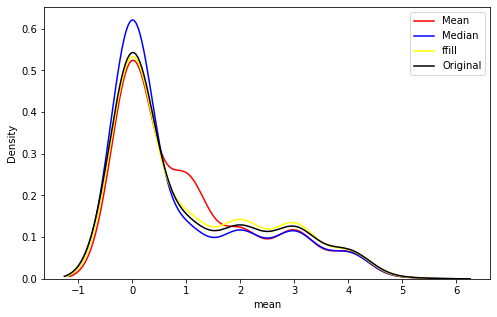

In [21]:
mean = data_copy.al.mean()
median = data_copy.al.median()
data_copy['mean'] = data_copy.al.fillna(mean)
data_copy['median'] = data_copy.al.fillna(median)
data_copy['new_al'] = data_copy.al.fillna(method = 'ffill')

sns.kdeplot(data_copy['mean'], color = 'red', label = 'Mean')
sns.kdeplot(data_copy['median'], color = 'blue', label = 'Median')
sns.kdeplot(data_copy['new_al'], color='yellow', label = 'ffill')
sns.kdeplot(data_copy['al'], color = 'black', label = 'Original')
plt.legend()

In [22]:
data['al'] = data_copy['new_al']
data['al'].isnull().sum()

0

**su columns**

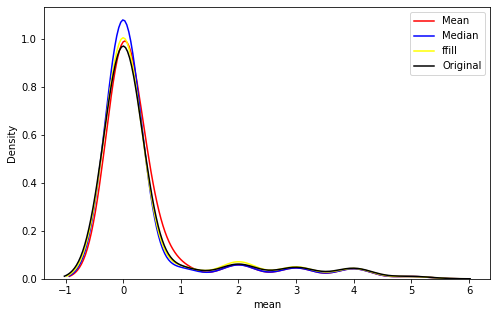

In [23]:
mean = data_copy.su.mean()
median = data_copy.su.median()
data_copy['mean'] = data_copy.su.fillna(mean)
data_copy['median'] = data_copy.su.fillna(median)
data_copy['new_su'] = data_copy.su.fillna(method = 'ffill')

sns.kdeplot(data_copy['mean'], color = 'red', label = 'Mean')
sns.kdeplot(data_copy['median'], color = 'blue', label = 'Median')
sns.kdeplot(data_copy['new_su'], color='yellow', label = 'ffill')
sns.kdeplot(data_copy['su'], color = 'black', label = 'Original')
plt.legend()

In [24]:
data['su'] = data_copy['new_su']
data['su'].isnull().sum()

0

**bgr column**

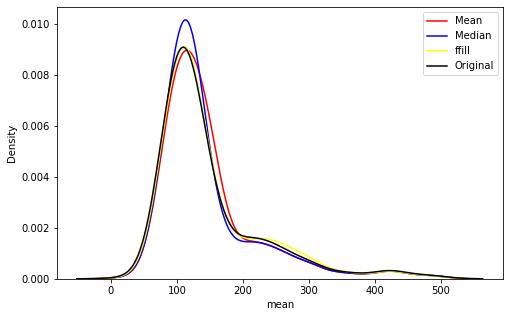

In [25]:
mean = data_copy.bgr.mean()
median = data_copy.bgr.median()
data_copy['mean'] = data_copy.bgr.fillna(mean)
data_copy['median'] = data_copy.bgr.fillna(median)
data_copy['new_bgr'] = data_copy.bgr.fillna(method = 'ffill')

sns.kdeplot(data_copy['mean'], color = 'red', label = 'Mean')
sns.kdeplot(data_copy['median'], color = 'blue', label = 'Median')
sns.kdeplot(data_copy['new_bgr'], color='yellow', label = 'ffill')
sns.kdeplot(data_copy['bgr'], color = 'black', label = 'Original')
plt.legend()

In [26]:
data['bgr'] = data_copy['new_bgr']
data['bgr'].isnull().sum()

0

**bu column**

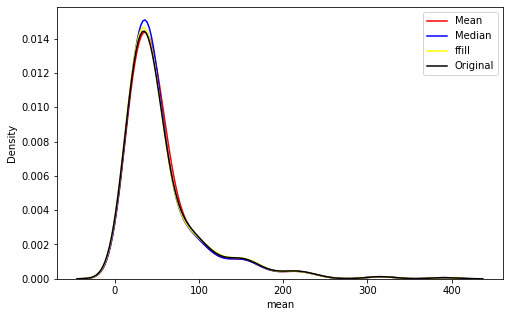

In [27]:
mean = data_copy.bu.mean()
median = data_copy.bu.median()
data_copy['mean'] = data_copy.bu.fillna(mean)
data_copy['median'] = data_copy.bu.fillna(median)
data_copy['new_bu'] = data_copy.bu.fillna(method = 'ffill')

sns.kdeplot(data_copy['mean'], color = 'red', label = 'Mean')
sns.kdeplot(data_copy['median'], color = 'blue', label = 'Median')
sns.kdeplot(data_copy['new_bu'], color='yellow', label = 'ffill')
sns.kdeplot(data_copy['bu'], color = 'black', label = 'Original')
plt.legend()

In [28]:
data['bu'] = data_copy['mean']
data['bu'].isnull().sum()

0

**sc column**

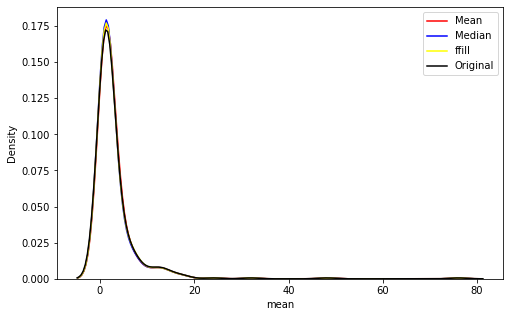

In [29]:
mean = data_copy.sc.mean()
median = data_copy.sc.median()
data_copy['mean'] = data_copy.sc.fillna(mean)
data_copy['median'] = data_copy.sc.fillna(median)
data_copy['new_sc'] = data_copy.sc.fillna(method = 'ffill')

sns.kdeplot(data_copy['mean'], color = 'red', label = 'Mean')
sns.kdeplot(data_copy['median'], color = 'blue', label = 'Median')
sns.kdeplot(data_copy['new_sc'], color='yellow', label = 'ffill')
sns.kdeplot(data_copy['sc'], color = 'black', label = 'Original')
plt.legend()

In [30]:
data['sc'] = data_copy['mean']
data['sc'].isnull().sum()

0

**sod column**

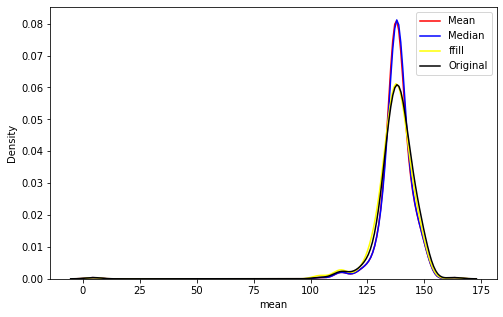

In [31]:
mean = data_copy.sod.mean()
median = data_copy.sod.median()
data_copy['mean'] = data_copy.sod.fillna(mean)
data_copy['median'] = data_copy.sod.fillna(median)
data_copy['new_sod'] = data_copy.sod.fillna(method = 'ffill')

sns.kdeplot(data_copy['mean'], color = 'red', label = 'Mean')
sns.kdeplot(data_copy['median'], color = 'blue', label = 'Median')
sns.kdeplot(data_copy['new_sod'], color='yellow', label = 'ffill')
sns.kdeplot(data_copy['sod'], color = 'black', label = 'Original')
plt.legend()

In [32]:
data['sod'] = data_copy['new_sod']
data['sod'].isnull().sum()

3

In [33]:
data_copy['sod'] = data['sod']
sod_mean = data_copy.sod.mean()
data_copy['mean'] = data_copy.sod.fillna(mean)
data['sod'] = data_copy['mean']
print(data['sod'].isnull().sum())

0


**pot columns**

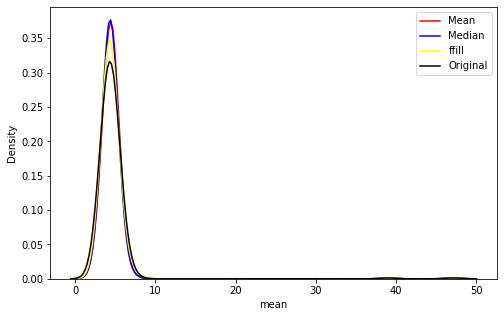

In [34]:
mean = data_copy.pot.mean()
median = data_copy.pot.median()
data_copy['mean'] = data_copy.pot.fillna(mean)
data_copy['median'] = data_copy.pot.fillna(median)
data_copy['new_pot'] = data_copy.pot.fillna(method = 'ffill')

sns.kdeplot(data_copy['mean'], color = 'red', label = 'Mean')
sns.kdeplot(data_copy['median'], color = 'blue', label = 'Median')
sns.kdeplot(data_copy['new_pot'], color='yellow', label = 'ffill')
sns.kdeplot(data_copy['pot'], color = 'black', label = 'Original')
plt.legend()

In [35]:
data['pot'] = data_copy['new_pot']
data['pot'].isnull().sum()

3

In [36]:
data_copy['pot'] = data['pot']
mean = data_copy.pot.mean()
data_copy['mean'] = data_copy.pot.fillna(mean)
data['pot'] = data_copy['mean']
print(data['pot'].isnull().sum())

0


**hemo column**

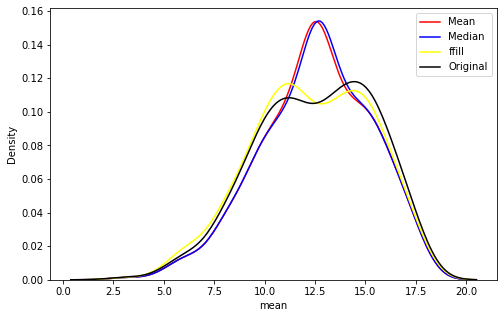

In [37]:
mean = data_copy.hemo.mean()
median = data_copy.hemo.median()
data_copy['mean'] = data_copy.hemo.fillna(mean)
data_copy['median'] = data_copy.hemo.fillna(median)
data_copy['new_hemo'] = data_copy.hemo.fillna(method = 'ffill')

sns.kdeplot(data_copy['mean'], color = 'red', label = 'Mean')
sns.kdeplot(data_copy['median'], color = 'blue', label = 'Median')
sns.kdeplot(data_copy['new_hemo'], color='yellow', label = 'ffill')
sns.kdeplot(data_copy['hemo'], color = 'black', label = 'Original')
plt.legend()

In [38]:
data['hemo'] = data_copy['new_hemo']
data['hemo'].isnull().sum()

0

## Let's deal with the categorical columns

In [39]:
data_categorical = data.select_dtypes(exclude = [np.number])
categorical_cols = data_categorical.columns.values
print(categorical_cols)

['rbc' 'pc' 'pcc' 'ba' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane'
 'classification']


**rbc column**

In [40]:
data['rbc'].isnull().sum()

152

In [41]:
data['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

<AxesSubplot:>

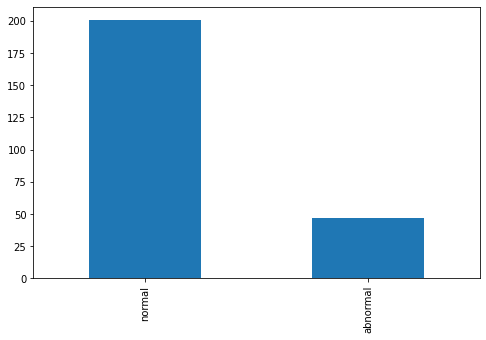

In [42]:
data['rbc'].value_counts().plot.bar()

In [43]:
data['rbc'].fillna(method = 'ffill', inplace = True)
data['rbc'].isnull().sum()

2

In [44]:
data['rbc'].fillna('normal', inplace = True)
data['rbc'].value_counts()

normal      291
abnormal    109
Name: rbc, dtype: int64

**pc column**

In [45]:
data['pc'].isnull().sum()

65

In [46]:
data['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

<AxesSubplot:>

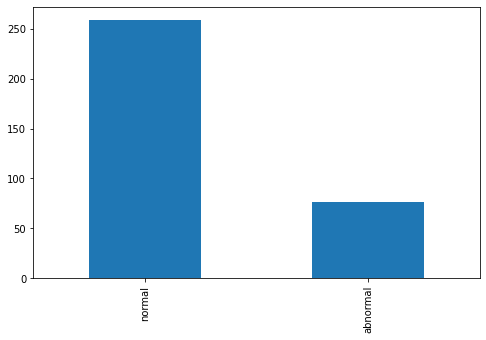

In [47]:
data['pc'].value_counts().plot.bar()

In [48]:
data['pc'].fillna(method = 'ffill', inplace = True)
data['pc'].value_counts()

normal      309
abnormal     91
Name: pc, dtype: int64

**pcc column**

In [49]:
data['pcc'].isnull().sum()

4

In [50]:
data['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

<AxesSubplot:>

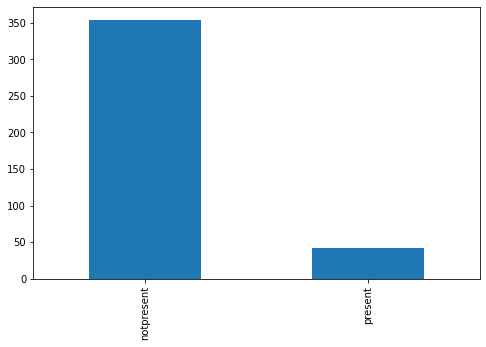

In [51]:
data['pcc'].value_counts().plot.bar()

In [52]:
data['pcc'].fillna(method = 'ffill', inplace = True)
data['pcc'].value_counts()

notpresent    358
present        42
Name: pcc, dtype: int64

**ba column**

In [53]:
data['ba'].isnull().sum()

4

In [54]:
data['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

<AxesSubplot:>

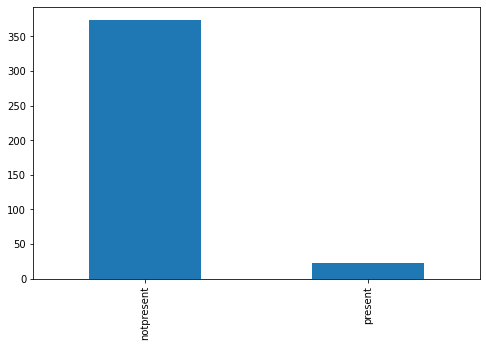

In [55]:
data['ba'].value_counts().plot.bar()

In [56]:
data['ba'].fillna(method = 'ffill', inplace = True)
data['ba'].value_counts()

notpresent    378
present        22
Name: ba, dtype: int64

**htn column**

In [57]:
data['htn'].isnull().sum()

2

In [58]:
data['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [59]:
data['htn'].fillna(method = 'ffill', inplace = True)
data['htn'].value_counts()

no     253
yes    147
Name: htn, dtype: int64

**dm column**

In [60]:
data['dm'].isnull().sum()

8

In [61]:
data['dm'].value_counts()

no     258
yes    134
Name: dm, dtype: int64

In [62]:
data['dm'].fillna(method = 'ffill', inplace = True)
data['dm'].value_counts()

no     263
yes    137
Name: dm, dtype: int64

**cad column**

In [63]:
data['cad'].isnull().sum()

4

In [64]:
data['cad'].value_counts()

no     362
yes     34
Name: cad, dtype: int64

In [65]:
data['cad'].fillna(method = 'ffill', inplace = True)
data['cad'].value_counts()

no     366
yes     34
Name: cad, dtype: int64

**appet column**

In [66]:
data['appet'].isnull().sum()

1

In [67]:
data['appet'].value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [68]:
data['appet'].fillna(method = 'ffill', inplace = True)
data['appet'].value_counts()

good    318
poor     82
Name: appet, dtype: int64

**pe column**

In [69]:
data['pe'].isnull().sum()

1

In [70]:
data['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [71]:
data['pe'].fillna(method = 'ffill', inplace = True)
data['pe'].value_counts()

no     324
yes     76
Name: pe, dtype: int64

**ane column**

In [72]:
data['ane'].isnull().sum()

1

In [73]:
data['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [74]:
data['ane'].fillna(method = 'ffill', inplace = True)

**Now we will look at the remaining numerical columns**

**pcv column**

In [75]:
data['pcv'].isnull().sum()

86

In [76]:
data['pcv'].value_counts()

52.0    21
41.0    21
44.0    19
48.0    19
40.0    16
42.0    13
45.0    13
32.0    12
50.0    12
36.0    12
33.0    12
28.0    12
37.0    11
34.0    11
46.0     9
30.0     9
29.0     9
35.0     9
31.0     8
24.0     7
39.0     7
26.0     6
38.0     5
53.0     4
51.0     4
49.0     4
47.0     4
54.0     4
25.0     3
22.0     3
27.0     3
19.0     2
23.0     2
15.0     1
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
16.0     1
14.0     1
Name: pcv, dtype: int64

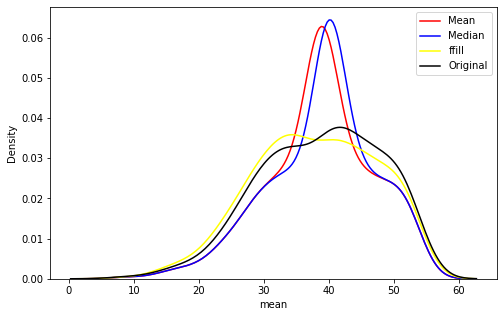

In [77]:
mean = data_copy.pcv.mean()
median = data_copy.pcv.median()
data_copy['mean'] = data_copy.pcv.fillna(mean)
data_copy['median'] = data_copy.pcv.fillna(median)
data_copy['new_pcv'] = data_copy['pcv'].fillna(method="ffill")

sns.kdeplot(data_copy['mean'],color='red',label='Mean')
sns.kdeplot(data_copy['median'],color='blue',label='Median')
sns.kdeplot(data_copy['new_pcv'] ,color='yellow',label='ffill')
sns.kdeplot(data_copy['pcv'],color='black',label='Original')
plt.legend()

In [78]:
data['pcv'] = data_copy['new_pcv']

**wc column**

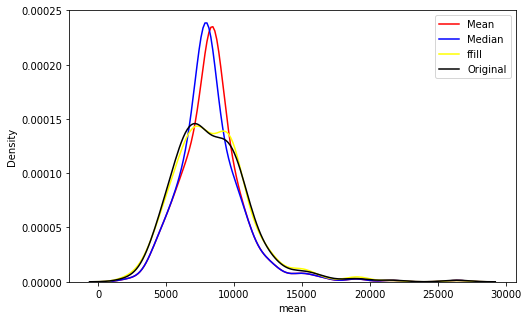

In [79]:
mean = data_copy.wc.mean()
median = data_copy.wc.median()
data_copy['mean'] = data_copy.wc.fillna(mean)
data_copy['median'] = data_copy.wc.fillna(median)
data_copy['new_wc'] = data_copy['wc'].fillna(method="ffill")

sns.kdeplot(data_copy['mean'],color='red',label='Mean')
sns.kdeplot(data_copy['median'],color='blue',label='Median')
sns.kdeplot(data_copy['new_wc'] ,color='yellow',label='ffill')
sns.kdeplot(data_copy['wc'],color='black',label='Original')
plt.legend()

In [80]:
data['wc'] = data_copy['new_wc']

**rc column**

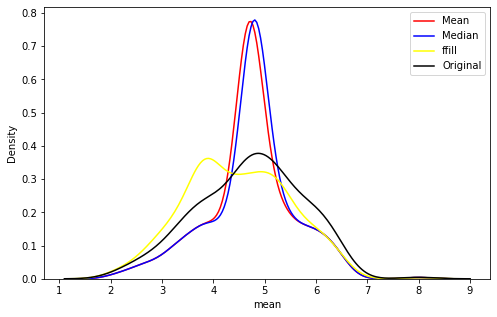

In [81]:
mean = data_copy.rc.mean()
median = data_copy.rc.median()
data_copy['mean'] = data_copy.rc.fillna(mean)
data_copy['median'] = data_copy.rc.fillna(median)
data_copy['new_rc'] = data_copy['rc'].fillna(method="ffill")

sns.kdeplot(data_copy['mean'],color='red',label='Mean')
sns.kdeplot(data_copy['median'],color='blue',label='Median')
sns.kdeplot(data_copy['new_rc'] ,color='yellow',label='ffill')
sns.kdeplot(data_copy['rc'],color='black',label='Original')
plt.legend()

In [82]:
data['rc'] = data_copy['new_rc']

In [83]:
data = data.drop('id', axis = 1)

**Finally we will take a look at our target column**

In [84]:
data['classification'].isnull().sum()

2

In [85]:
data['classification'].value_counts()

ckd       248
notckd    150
Name: classification, dtype: int64

In [86]:
data['classification'].fillna(method = 'ffill', inplace = True)
data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

We can say that there is relatively good balance between the categories of the target column and therefore we will not manipulate this natural balance.

**Handling outliers** 

In [87]:
data_numerical = data.select_dtypes(include = [np.number])
numerical_cols = data_numerical.columns.values
print(numerical_cols)

['age' 'bp' 'sg' 'al' 'su' 'bgr' 'bu' 'sc' 'sod' 'pot' 'hemo' 'pcv' 'wc'
 'rc']


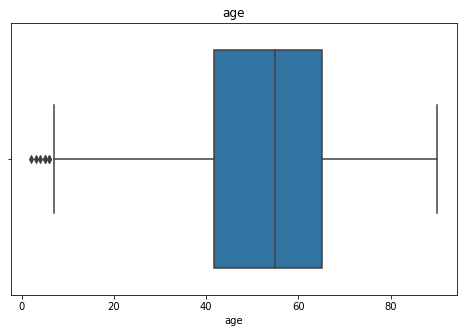

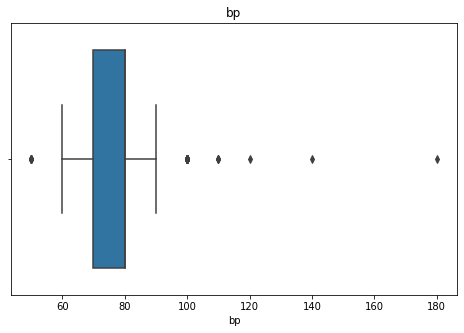

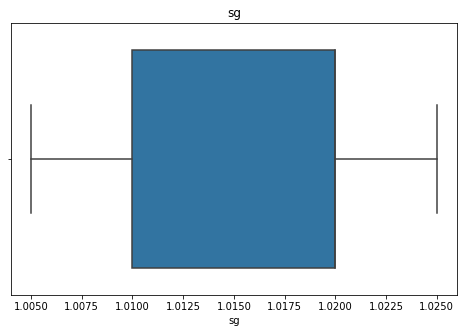

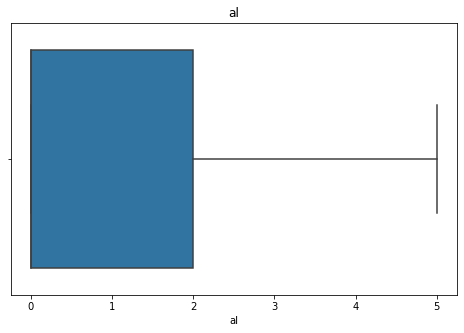

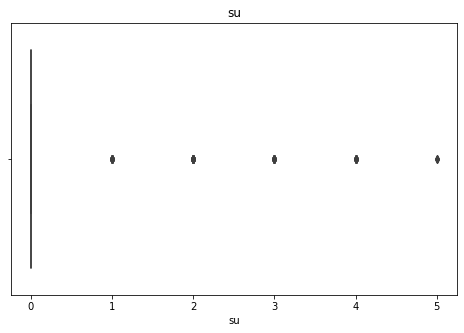

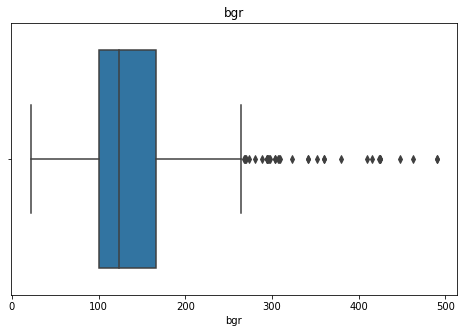

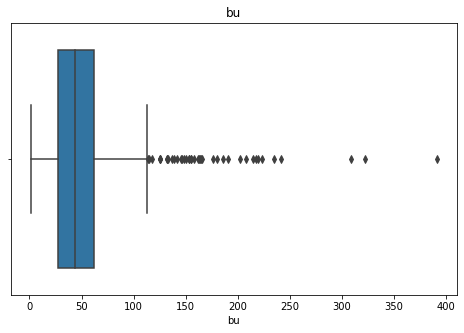

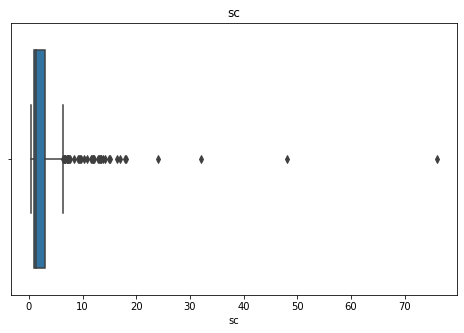

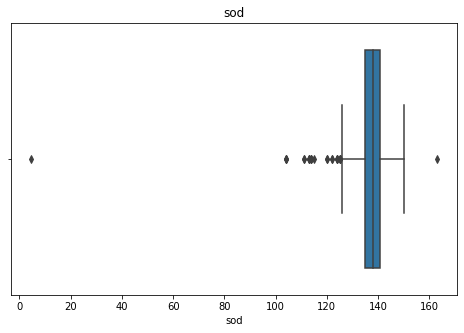

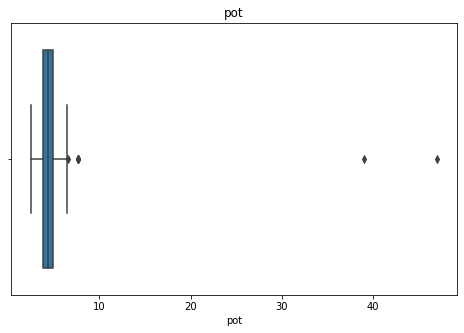

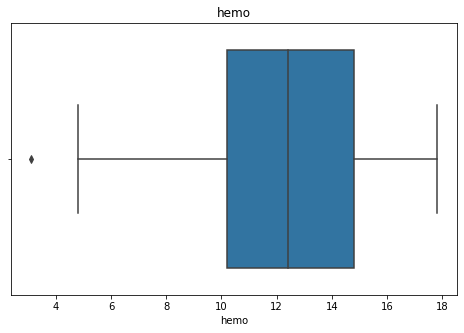

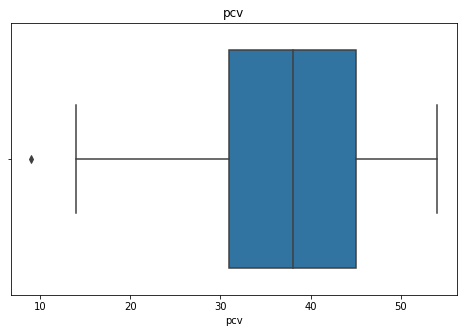

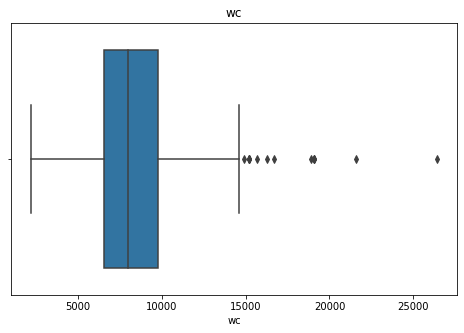

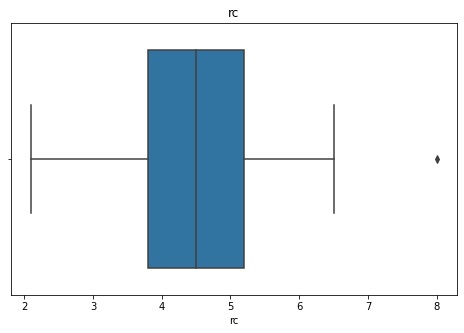

In [88]:
for i in data_numerical.columns:
    sns.boxplot(data_numerical[i])
    plt.title(i)
    plt.show()

Splitting data

In [89]:
target = data['classification']
features = data.drop(['classification'], axis = 1)

Data transformation

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(target)

In [91]:
le = LabelEncoder()

for i in features.select_dtypes(exclude = [np.number]).columns:
    features[i] = le.fit_transform(data[i])

Scaling data

In [92]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(features)

MinMaxScaler()

In [93]:
new_features = minmax.transform(features)
print(new_features)

[[0.52272727 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.05681818 0.         0.75       ... 0.         0.         0.        ]
 [0.68181818 0.23076923 0.25       ... 1.         0.         1.        ]
 ...
 [0.11363636 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.17045455 0.07692308 1.         ... 0.         0.         0.        ]
 [0.63636364 0.23076923 1.         ... 0.         0.         0.        ]]


In [94]:
print(new_features.shape)

(400, 24)


In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_features, y, test_size = 0.1, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(360, 24) (40, 24) (360,) (40,)


## Model creation

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score

In [97]:
def beautiful(techniques):
    print(techniques)
    model_name = ["RF", "DT", 'GB', 'AB', 'LR']
    RFC = RandomForestClassifier(random_state = 0)
    DTC = DecisionTreeClassifier(random_state = 0)
    GBM = GradientBoostingClassifier(random_state = 0)
    ABC = AdaBoostClassifier(random_state = 0)
    LRC = LogisticRegression(random_state = 0)

    for clf,i in zip([RFC, DTC, GBM, ABC, LRC], model_name):
        model = clf.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_pred_prob = model.predict_proba(x_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(x_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(x_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        #print(confusion_matrix =confusion_matrix(y_test, y_pred))
        
        print("\n","-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred), "\n\n\n")
        
beautiful("techniques......")

techniques......
######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 1.000000

 --------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40
 



######################### DT #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 1.000000

 --------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg